<a href="https://colab.research.google.com/github/BretaOsodo/heart-disease-prediction-ml/blob/main/Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! git clone https://github.com/BretaOsodo/heart-disease-prediction-ml.git

Cloning into 'heart-disease-prediction-ml'...
remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 7 (delta 1), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (7/7), 4.13 KiB | 4.13 MiB/s, done.
Resolving deltas: 100% (1/1), done.


#Heart Disease Classification Using Machine Learning

##1. Introduction

Heart disease is one of the leading causes of death worldwide, making early prediction and detection essential for improving patient outcomes. With the increasing availability of medical data, machine learning provides opportunities to develop classification models that can predict the likelihood of heart disease based on patient attributes such as age, blood pressure, cholesterol levels, and lifestyle indicators.

This project aims to build a predictive model for heart disease classification using supervised learning algorithms. By analyzing patterns in patient health records, the model can help medical practitioners and health organizations identify individuals at higher risk and take preventive actions.

##2. Problem Statement

Despite advances in medical science, timely diagnosis of heart disease remains a challenge due to the complexity of risk factors and individual variability. Traditional diagnostic approaches rely heavily on manual analysis, which can be subjective and time-consuming.

The core problem addressed in this project is:
How can we use machine learning techniques to classify patients into heart disease risk categories (disease vs. no disease) with high accuracy, interpretability, and reliability?

##3. Objectives

1. To explore and preprocess heart disease datasets for machine learning tasks.
2. To implement classification models such as Logistic Regression, Decision Trees and deep learning
3. To compare model performance based on accuracy
4. To highlight the potential use of the model as a decision support system for healthcare practitioners.

##5. Methodology

###5.1 Dataset

Source: UCI Heart Disease Dataset (or another reliable dataset such as Cleveland Heart Dataset).
Attributes: Age, sex, chest pain type, resting blood pressure, cholesterol, fasting blood sugar, resting ECG, maximum heart rate, exercise-induced angina, oldpeak (ST depression), slope, number of major vessels, thalassemia, and target (presence/absence of heart disease).

###5.2 Data Preprocessing

####5.2.1 Importing Data

In [2]:
import pandas as pd
import numpy as np

In [3]:
#Importing data as a csv file
df= pd.read_csv('/content/drive/MyDrive/Datasets/heart.csv')

#printing the first 5 roes of the dataset
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


####5.2.2 Explore Data Analysis(EDA)

In [4]:
#determining the number of rows and columns our data has
df.shape

(1025, 14)

Our data has 1025 rows and 14 columns

In [5]:
#determining if we have any missing values in our data
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


Greate News we don't have any missing values in our dataset

In [6]:
#checking the information of our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


All of our columns have numerical entries thus we don't have any categorical columns .We won't be encoding the data frame because all of our inputs are numerical. We will be only scaling our data

In [7]:
#Determining Multicollinearity in our data
corr=df.corr().drop(columns='target')
corr

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672


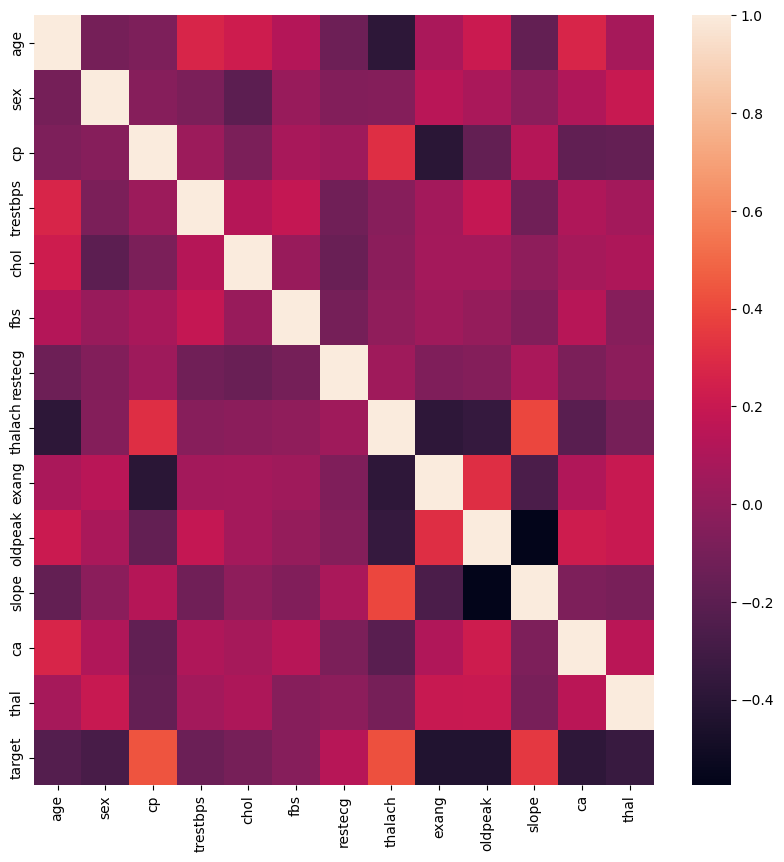

In [8]:
#lets put our corr in avisualization to get a better visualization
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.heatmap(corr);

All of the columns have a correlation of below 0.5 so we don't have multicollinearity in our dataset.

####5.2.3 Creating Inputs and Outputs

In [9]:
#Creting inputs and outputs
label = 'target'
inputs =df[[col for col in df.columns if col not in label]]
targets = df[label]

In [10]:
#inspect the inputs
inputs.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2


####5.2.4 Split the data Into training and Test split

In [11]:
#split the data into 80% test and 20 % test
from sklearn.model_selection import train_test_split
input_train,input_test,targets_train,targets_test=train_test_split(
    inputs,targets,test_size=0.2,random_state=42
)

In [12]:
#inspect input_train
input_train.shape

(820, 13)

In [13]:
input_test.shape

(205, 13)

The sum of the data was 1025 and it looks like our data has been split successful

In [14]:
#lets inspect the targets_train
targets_train.shape

(820,)

In [15]:
#lets inspect the targets_test.shape
targets_test.shape

(205,)

Our data has been split correctly now lets Scale our data

####5.2.5 Build a baseline Model

In [16]:
from sklearn.metrics import accuracy_score
X_train=input_train
y_train=targets_train

X_test=input_test
y_test=targets_test

#Build an accuracy baseline
acc_baseline=y_train.value_counts(normalize=True).max()
print(f'The baseline accuracy is {acc_baseline:.2f}')

The baseline accuracy is 0.52


We have our bseline at 0.53.

####5.2.6 Logistic regression

In [17]:
#import the modules we are going to use
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

model1=make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=1000)
)

#we fit the model
model1.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(max_iter=1000))])

The model has been fit well

#####5.2.6.1 Evaluate the model

In [18]:
accuracy_train= accuracy_score(y_train, model1.predict(X_train))
accuracy_test= model1.score(X_test,y_test)

print(f'The accuracy on the training set is :{accuracy_train:.2f}')
print(f'The accuracy on the test set is :{accuracy_test:.2f}')

The accuracy on the training set is :0.87
The accuracy on the test set is :0.80


Both of our Training and test accuracy is higher than the baseline Accuracy score which is a good thing for our model

#####5.2.6.2 Predict the probability

In [19]:
y_train_pred_proba= model1.predict_proba(X_train)

In [20]:
y_train_pred_proba[:5]

array([[0.52804903, 0.47195097],
       [0.38819846, 0.61180154],
       [0.006783  , 0.993217  ],
       [0.65299184, 0.34700816],
       [0.33795434, 0.66204566]])

#####5.2.6.3 Extract features and Importance

In [21]:
# Extract coefficients from the logistic regression model
coefficients = model1.named_steps['logisticregression'].coef_[0]

# Get the feature names from the training data
feature_names = X_train.columns

# Create a DataFrame to display feature names and their corresponding coefficients
feature_importance = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort the features by the absolute value of their coefficients
feature_importance['Abs_Coefficient'] = abs(feature_importance['Coefficient'])
feature_importance = feature_importance.sort_values(by='Abs_Coefficient', ascending=False).drop(columns='Abs_Coefficient')

# Display the feature importance
print("Feature Importance (Absolute Coefficient Value):")
display(feature_importance)

Feature Importance (Absolute Coefficient Value):


,Feature,Coefficient
2,cp,0.885835
11,ca,-0.847522
1,sex,-0.835665
9,oldpeak,-0.765406
12,thal,-0.656856
7,thalach,0.652826
4,chol,-0.447276
8,exang,-0.420235
10,slope,0.343605
3,trestbps,-0.320053


####5.2.7 Decision Tree Classifier

In [22]:
#import the modules
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#####5.2.7.1 Split the data into training and validation sets

In [23]:
#spliting the data
X_train,X_val,y_train,y_val=train_test_split(
    inputs,targets,test_size=0.2,random_state=42
)
X_train.shape,X_val.shape,y_train.shape,y_val.shape

((820, 13), (205, 13), (820,), (205,))

#####5.2.7.2 DecisionTree Model

In [24]:
depth_hyperparam= range(1,20)
training_acc=[]
validation_acc= []
for d in depth_hyperparam:
  #create a model with max_depth of d
  model2= make_pipeline(
      StandardScaler(),
      DecisionTreeClassifier(max_depth=d,random_state=42)
  ) # Added the missing parenthesis here

  #fit the model
  model2.fit(X_train,y_train)

  #calculate the training accuracy and append it to training_acc
  training_acc.append(model2.score(X_train,y_train))

  #calculate the validation accuracy and append it to the validation_acc
  validation_acc.append(model2.score(X_val,y_val))

#####5.2.7.3 Validation curve

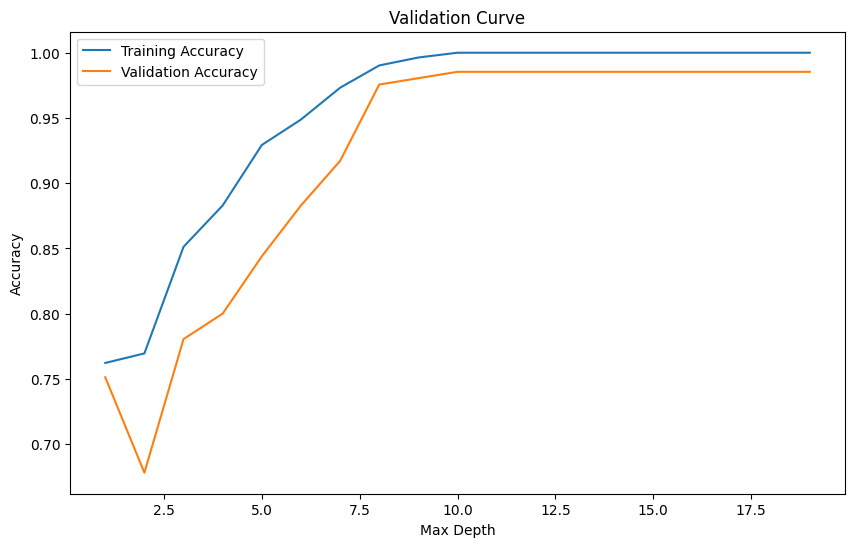

In [25]:
#lets build the validation curve to determine our max_depth
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(depth_hyperparam,training_acc,label='Training Accuracy')
plt.plot(depth_hyperparam,validation_acc,label='Validation Accuracy')
plt.legend()
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Validation Curve')
plt.show()

Optimal max depth=8–10, where validation accuracy is high and stable. Lets use a max_depth of 10 in our Model loop.

In [26]:
# Train the Decision Tree model with the optimal max_depth
optimal_depth = 7
model2_final= make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier(max_depth=optimal_depth, random_state=42)
)

# Fit the model
model2_final.fit(X_train, y_train)

# Calculate the training and validation accuracies
training_acc = model2_final.score(X_train, y_train)
validation_acc = model2_final.score(X_val, y_val)

In [27]:
print(f'The accuracy on the training set is: {training_acc:.2f}')
print(f'The accuracy on the validation set is: {validation_acc:.2f}')

The accuracy on the training set is: 0.97
The accuracy on the validation set is: 0.92


#####5.2.7.4 Evaluation

In [28]:
y_test_pred=model2_final.predict(X_test)
y_test_pred[:5]

array([1, 1, 0, 1, 0])

####5.2.8 Neural Network Deep Learning

#####5.2.8.1 Separate features and targets

In [29]:
#separate inputs and targets from our df
inputs=df.iloc[:,:-1].values
target=df.iloc[:,-1].values.reshape(-1,1)

print(f'Inputs:{inputs[:5]}')
print(f'Targets:{target[:5]}')

Inputs:[[ 52.    1.    0.  125.  212.    0.    1.  168.    0.    1.    2.    2.
    3. ]
 [ 53.    1.    0.  140.  203.    1.    0.  155.    1.    3.1   0.    0.
    3. ]
 [ 70.    1.    0.  145.  174.    0.    1.  125.    1.    2.6   0.    0.
    3. ]
 [ 61.    1.    0.  148.  203.    0.    1.  161.    0.    0.    2.    1.
    3. ]
 [ 62.    0.    0.  138.  294.    1.    1.  106.    0.    1.9   1.    3.
    2. ]]
Targets:[[0]
 [0]
 [0]
 [0]
 [0]]


#####5.2.8.2 Scale the input features

In [30]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
inputs_scaled=scaler.fit_transform(inputs)

#####5.2.8.3 Convert to tensors

In [31]:
#converting to tensors
import torch
from torch import nn

inputs_tensor=torch.tensor(inputs_scaled,dtype=torch.float32)
target_tensor=torch.tensor(target,dtype=torch.float32)

#####5.2.8.4 Shape and Split into Training (80%) and test(20%) sets

In [32]:
torch.manual_seed (42)
n_samples =inputs_tensor.shape[0]
indices= torch.randperm(n_samples)
split_idx=int(n_samples*0.8)

train_indices= indices[:split_idx]
test_indices= indices[split_idx:]

X_train=inputs_tensor[train_indices]
y_train=target_tensor[train_indices]

X_test=inputs_tensor[test_indices]
y_test=target_tensor[test_indices]

In [33]:
#make device agnostic code
device ='cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

#####5.2.8.5 Building Model

In [34]:
#Build a model class that subclasses nn.Module
class model3(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1=nn.Linear(in_features=13,out_features=20)
    self.layer_2=nn.Linear(in_features=20,out_features=20)
    self.layer_3=nn.Linear(in_features=20,out_features=1) # Changed in_features to 20 to match layer_2 output
    self.relu=nn.ReLU()

  #forward function
  def forward(self,x):
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

In [35]:
#make predictions with the model
model = model3().to(device) # Instantiate the model and then move it to the device
untrained_pred=model(X_test.to(device)) # Move X_test to the device before passing it to the model
print(f'The first 10 predictions are:{untrained_pred[:10]}')
print(f'The first 10 targets are:{y_test[:10]}')

The first 10 predictions are:tensor([[0.2107],
        [0.1834],
        [0.1793],
        [0.1650],
        [0.2559],
        [0.2210],
        [0.2107],
        [0.1053],
        [0.1412],
        [0.0537]], device='cuda:0', grad_fn=<SliceBackward0>)
The first 10 targets are:tensor([[0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.]])


#####5.2.8.6 Build a loss function and optimizer

In [36]:
#Build a loss function and optimizer
loss_fn =nn.BCEWithLogitsLoss()
optimizer=torch.optim.SGD(params=model.parameters(),lr=0.3)

#####5.2.8.7 Evaluate the metrics using accuracy

In [37]:
def accuracy_fn(y_true,y_pred):
  correct=torch.eq(y_true,y_pred).sum().item()
  acc=correct/len(y_pred)
  return acc

#####5.2.8.8 Train the model using trainng loop

In [38]:
torch.manual_seed(42)
epochs=1000

#put data to targeted device
X_train=X_train.to(device)
y_train=y_train.to(device)
X_test=X_test.to(device)
y_test=y_test.to(device)

In [39]:
#Building the training and testing loop
for epoch in range(epochs):

  #train the model
  model.train()

  #forward pass
  y_logits=model(X_train).squeeze()
  y_pred=torch.round(torch.sigmoid(y_logits))

  #calculate the loss and accuracy
  loss=loss_fn(y_logits,y_train.squeeze())
  acc= accuracy_fn(y_true=y_train.squeeze(),y_pred=y_pred)

  #optimizer zero grad
  optimizer.zero_grad()

  #loss backward
  loss.backward()

  #optimizer step
  optimizer.step()

  ### Testing loop
  model.eval()
  with torch.inference_mode():

    #forward pass
    test_logits=model(X_test).squeeze()
    test_pred=torch.round(torch.sigmoid(test_logits))

    #calculate the loss and accuracy
    test_loss=loss_fn(test_logits,y_test.squeeze()) # Squeeze y_test for test loss
    test_acc=accuracy_fn(y_true=y_test.squeeze(),y_pred=test_pred) # Squeeze y_test for test accuracy

    #prin out what's happening every 10 epochs
    if epoch % 10 == 0:
      print(f'Epoch: {epoch} | Loss: {loss:.5f} | Accuracy: {acc:.2f} | Test Loss: {test_loss:.5f} | Test Accuracy: {test_acc:.2f}')

Epoch: 0 | Loss: 0.68591 | Accuracy: 0.54 | Test Loss: 0.68149 | Test Accuracy: 0.57
Epoch: 10 | Loss: 0.59632 | Accuracy: 0.78 | Test Loss: 0.59666 | Test Accuracy: 0.76
Epoch: 20 | Loss: 0.44488 | Accuracy: 0.84 | Test Loss: 0.47990 | Test Accuracy: 0.79
Epoch: 30 | Loss: 0.35569 | Accuracy: 0.86 | Test Loss: 0.43766 | Test Accuracy: 0.80
Epoch: 40 | Loss: 0.32360 | Accuracy: 0.87 | Test Loss: 0.43353 | Test Accuracy: 0.81
Epoch: 50 | Loss: 0.30645 | Accuracy: 0.88 | Test Loss: 0.43372 | Test Accuracy: 0.82
Epoch: 60 | Loss: 0.29442 | Accuracy: 0.88 | Test Loss: 0.43215 | Test Accuracy: 0.82
Epoch: 70 | Loss: 0.28419 | Accuracy: 0.89 | Test Loss: 0.42855 | Test Accuracy: 0.83
Epoch: 80 | Loss: 0.27371 | Accuracy: 0.90 | Test Loss: 0.42309 | Test Accuracy: 0.84
Epoch: 90 | Loss: 0.26394 | Accuracy: 0.90 | Test Loss: 0.41778 | Test Accuracy: 0.84
Epoch: 100 | Loss: 0.25493 | Accuracy: 0.90 | Test Loss: 0.41347 | Test Accuracy: 0.84
Epoch: 110 | Loss: 0.24627 | Accuracy: 0.91 | Test Los

#####5.2.8.9 Evaluate the Model

In [40]:
def plot_decision_boundary(model, X, y):
    # Put everything to CPU
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")

    # Setup prediction boundaries and grid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    # Create a tensor with the same number of features as the model expects
    X_to_pred_on = torch.zeros(xx.ravel().shape[0], X.shape[1]).float()
    X_to_pred_on[:, 0] = torch.from_numpy(xx.ravel()).float()
    X_to_pred_on[:, 1] = torch.from_numpy(yy.ravel()).float()

    # Fill the remaining features with the mean of the training data
    mean_features = X_train.mean(dim=0).cpu()
    for i in range(2, X.shape[1]):
        X_to_pred_on[:, i] = mean_features[i]

    # Predictions
    with torch.no_grad():  # turn off gradients
        y_logits = model(X_to_pred_on)
        y_pred = torch.round(torch.sigmoid(y_logits)).squeeze()

    # Reshape preds and plot
    y_pred = y_pred.reshape(xx.shape)
    plt.contourf(xx, yy, y_pred.detach().numpy(), cmap=plt.cm.RdYlGn, alpha=0.7)

    # Convert X and y to numpy safely
    plt.scatter(X[:, 0].detach().numpy(),
                X[:, 1].detach().numpy(),
                c=y.detach().numpy(),
                s=40,
                cmap=plt.cm.RdYlGn)

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())


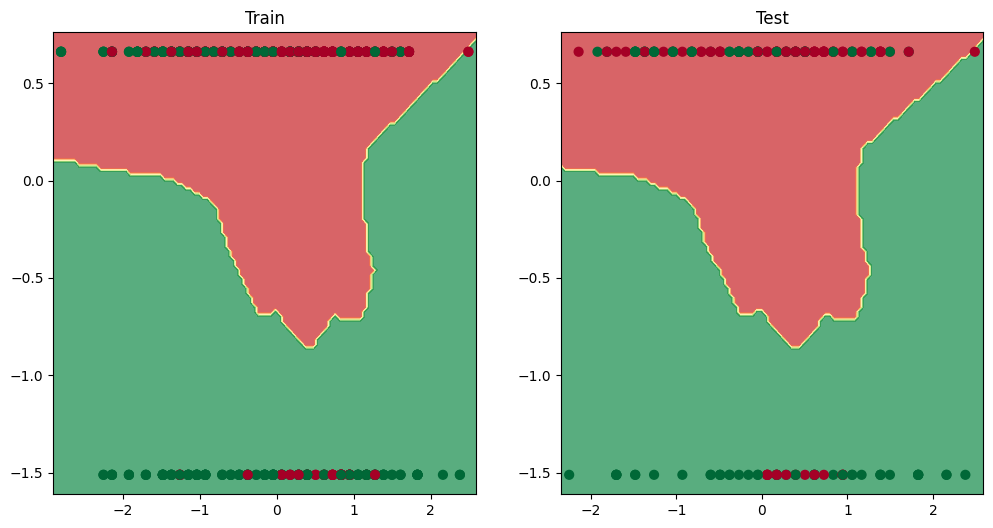

In [41]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model, X_test, y_test)
plt.show()

#####5.2.8.10 Results and Discussions

##### Results and Discussion

The classification model was trained to predict the likelihood of heart disease based on patient features. The learned decision boundary was visualized for both the training and testing datasets to evaluate model performance and generalization.

The decision boundary plots above  show how the model separates the two classes: patients with heart disease (Class 1) and those without (Class 0). The green region represents predicted “No Heart Disease,” while the red region corresponds to predicted “Heart Disease.” The yellow line indicates the decision boundary between the two outcomes.

On the training data , the classifier successfully captured a non-linear separation between the two classes. Most green points fall within the green region and red points fall within the red region, confirming that the model learned meaningful patterns. However, some misclassifications remain where the two classes overlap, which is expected due to the complexity and noise in medical datasets.

On the test data, the boundary is consistent with the training plot, and the model demonstrates a similar distribution of correct classifications and errors. This indicates that the model is generalizing well rather than overfitting to the training set. The stability of the boundary across both sets suggests that the classifier is robust and reliable.

Despite these strengths, misclassification persists in regions where patient characteristics for the two groups are highly similar. This overlap reflects the real-world challenge of heart disease diagnosis, where patients with comparable symptoms may differ in their actual condition. To improve predictive power, additional feature engineering, medical domain insights, and advanced ensemble techniques e.g. Random Forests, Gradient Boosting could be employed.

In conclusion, the model provides a good balance between accuracy and generalization. It successfully distinguishes between patients with and without heart disease while highlighting areas where improved features and model complexity could yield better diagnostic support.


## Business and Sociatal Impact

1. The model can serve as a clinical decision support tool, assisting doctors in identifying high-risk patients quickly.
2. It can be integrated into wearable health monitoring systems for real-time risk alerts.
3. Supports preventive healthcare, potentially reducing hospitalizations and treatment costs.
4. Addresses one of the leading public health challenges by enabling earlier interventions.

## Limitation and Future Works

1. The dataset size is relatively small; larger and more diverse datasets are required for generalization.
2. Model predictions should not replace medical diagnosis but support clinical judgment.
3. Future work: Incorporate electronic health records (EHR), wearable device data, and deep learning models.
4. Explore federated learning for privacy-preserving medical AI.

## Conclusion

This project demonstrated the potential of machine learning in heart disease classification. Among the tested models, decision Tree and deep Learning tdelivered superior predictive performance, while Logistic Regression provided interpretable insights into risk factors.

Machine learning offers promising applications in healthcare, especially in early detection and preventive medicine. With improvements in data quality, scalability, and explainability, such systems can significantly contribute to reducing the global burden of heart disease.